# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
import time
from skopt import BayesSearchCV
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
data = pd.read_csv("clustered_data.csv")
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Month,ClusterLabel
0,0,3039,3432,6,2.55,17850.0,35,0,0
1,0,2478,3440,6,3.39,17850.0,35,0,0
2,0,2677,784,8,2.75,17850.0,35,0,2
3,0,2629,1673,6,3.39,17850.0,35,0,0
4,0,2628,2568,6,3.39,17850.0,35,0,0
5,0,724,1322,6,4.25,17850.0,35,0,0
6,1,1424,1434,6,1.85,17850.0,35,0,0
7,1,1423,1431,6,1.85,17850.0,35,0,0
8,2,1528,2419,6,2.10,13047.0,35,0,0
9,2,1531,2420,6,2.10,13047.0,35,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339453 entries, 0 to 339452
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     339453 non-null  int64  
 1   StockCode     339453 non-null  int64  
 2   Description   339453 non-null  int64  
 3   Quantity      339453 non-null  int64  
 4   UnitPrice     339453 non-null  float64
 5   CustomerID    339453 non-null  float64
 6   Country       339453 non-null  int64  
 7   Month         339453 non-null  int64  
 8   ClusterLabel  339453 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 23.3 MB


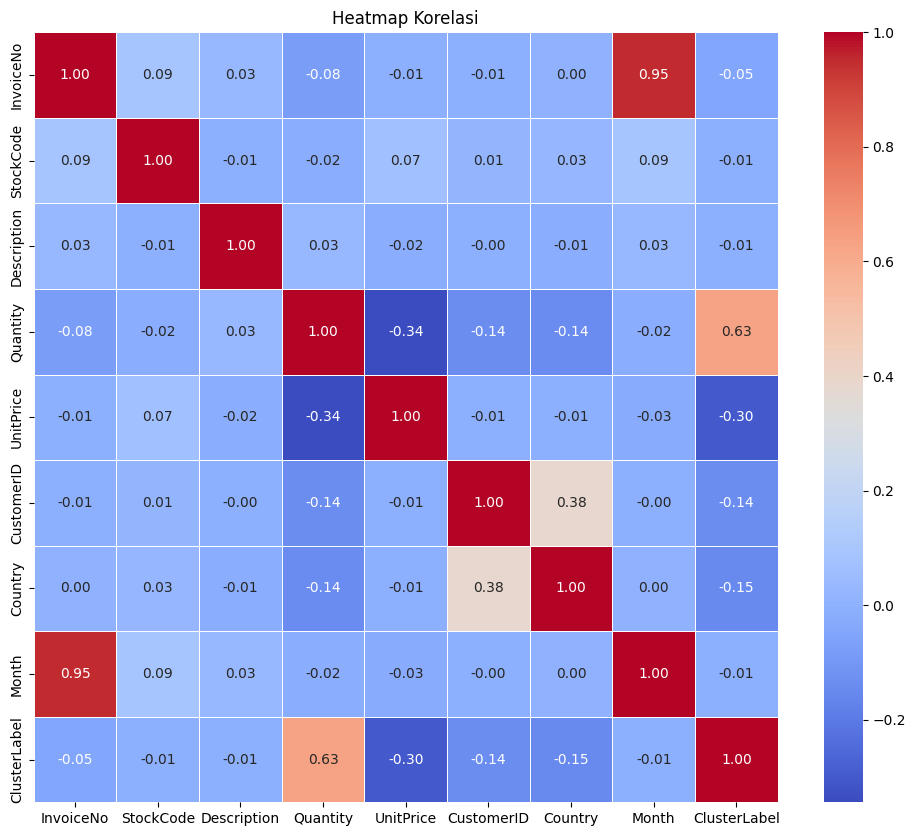

In [5]:
correlation_matrix = data.corr()

plt.figure(figsize=(12,10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.7)
plt.title("Heatmap Korelasi")
plt.show()

In [ ]:
print(correlation_matrix['ClusterLabel'])


InvoiceNo      -0.046316
StockCode      -0.008193
Description    -0.010393
Quantity        0.632281
UnitPrice      -0.300457
CustomerID     -0.136155
Country        -0.145776
Month          -0.011529
ClusterLabel    1.000000
Name: ClusterLabel, dtype: float64


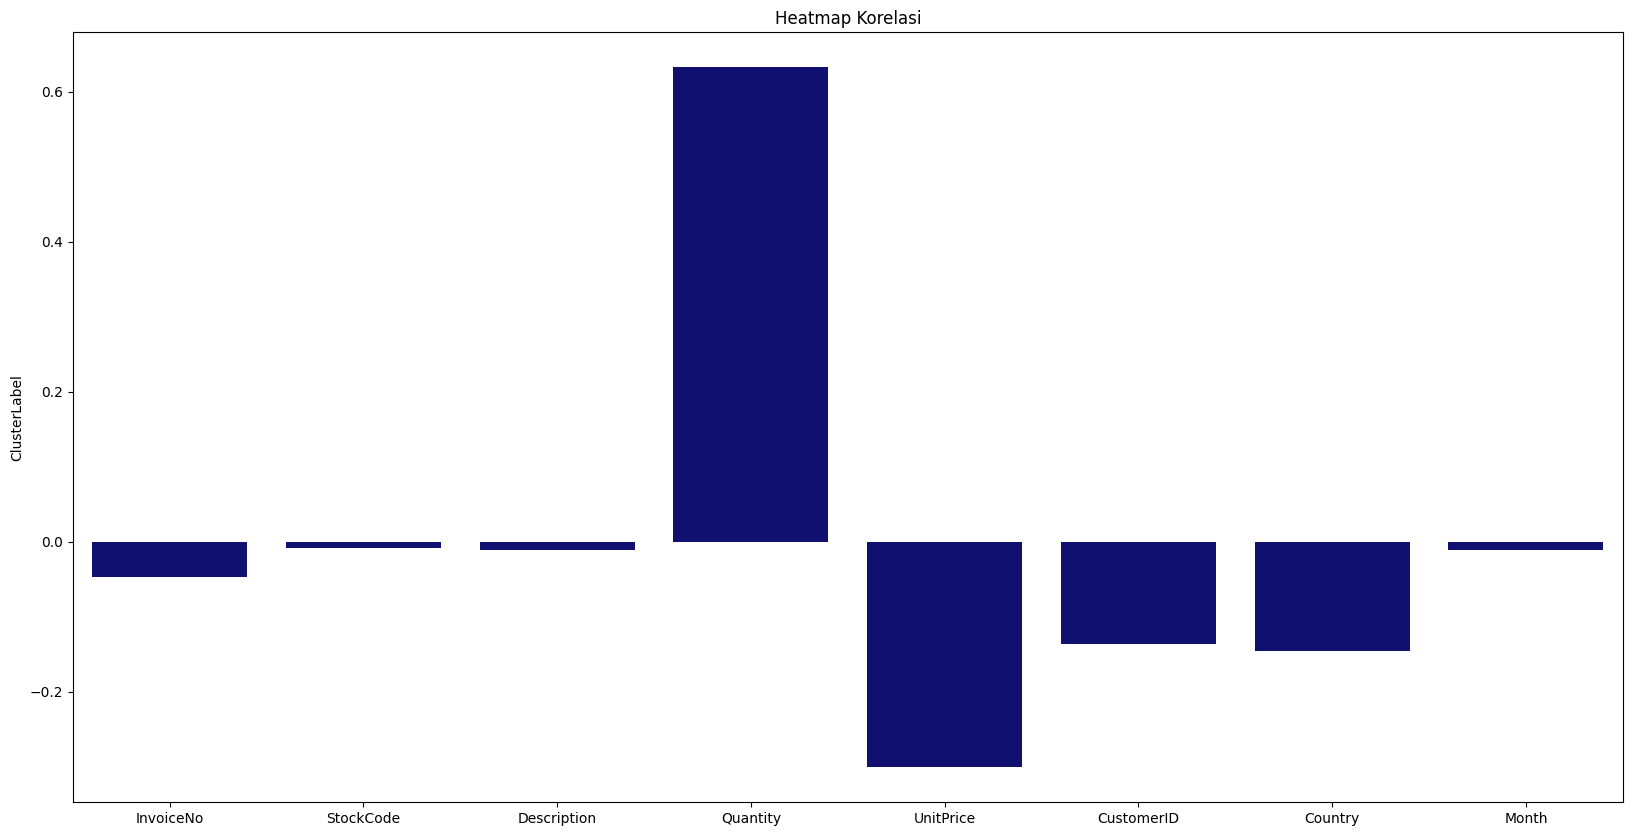

In [9]:
non_targeted_variables = data.drop(columns=['ClusterLabel']).columns

plt.figure(figsize=(20,10))

sns.barplot(correlation_matrix['ClusterLabel'][:8], color='navy')
plt.title("Heatmap Korelasi")
plt.show()

Karena beberapa fitur tidak memiliki pengaruh yang cukup besar, kita akan memilih fitur yang memiliki korelasi absolute > 0.1

In [14]:
data = data[["Quantity", "UnitPrice", "CustomerID", "Country", "ClusterLabel"]]

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339453 entries, 0 to 339452
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Quantity      339453 non-null  int64  
 1   UnitPrice     339453 non-null  float64
 2   CustomerID    339453 non-null  float64
 3   Country       339453 non-null  int64  
 4   ClusterLabel  339453 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 12.9 MB


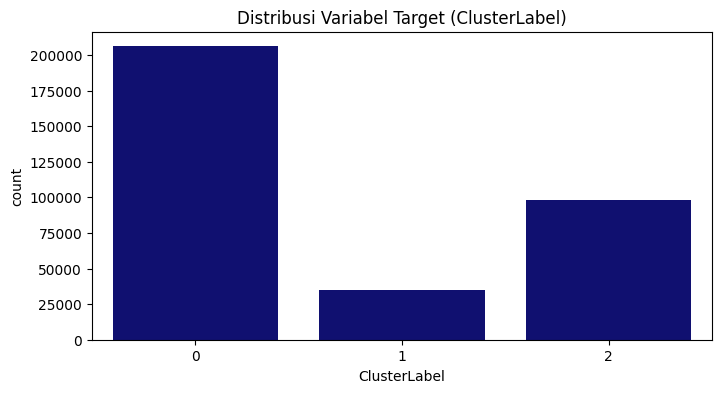

In [10]:
plt.figure(figsize=(8,4))

sns.countplot(x=data['ClusterLabel'], color='navy')
plt.title('Distribusi Variabel Target (ClusterLabel)')
plt.show()

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [16]:
x = data.drop(columns=['ClusterLabel'])
y = data['ClusterLabel']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


print(f"Training set shape: X_train={x_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={x_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(237617, 4), y_train=(237617,)
Test set shape: X_test=(101836, 4), y_test=(101836,)


Lakukan standarisasi dengan memastikan tidak membocorkan data test.

In [23]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) 

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [24]:
lr = LogisticRegression().fit(x_train, y_train)
dt = DecisionTreeClassifier().fit(x_train, y_train)
rf = RandomForestClassifier().fit(x_train, y_train)
knn = KNeighborsClassifier().fit(x_train, y_train)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    dict_report = classification_report(y_test, y_pred, output_dict=True)
    print(model)
    print(report)
    # print(dict_report['macro avg']['precision'])

    result = {
        'Accuracy (avg)': f"{dict_report['accuracy']:.2f}",
        'Precision (avg)': f"{dict_report['macro avg']['precision']:.2f}",
        'Recall (avg)': f"{dict_report['macro avg']['recall']:.2f}",
        'F1-Score (avg)': f"{dict_report['macro avg']['f1-score']:.2f}"
    }

    return result

results = {
    'Logistic Regression (LR)': evaluate_model(lr, x_test, y_test),
    'Decision Tree (DT)' : evaluate_model(dt, x_test, y_test),
    'Random Forest (RF)' : evaluate_model(rf, x_test, y_test),
    'K-Nearest Neighbors (KNN)' : evaluate_model(knn, x_test, y_test)
}

print(results)

LogisticRegression()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61692
           1       1.00      1.00      1.00     10490
           2       1.00      1.00      1.00     29654

    accuracy                           1.00    101836
   macro avg       1.00      1.00      1.00    101836
weighted avg       1.00      1.00      1.00    101836

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61692
           1       1.00      1.00      1.00     10490
           2       1.00      1.00      1.00     29654

    accuracy                           1.00    101836
   macro avg       1.00      1.00      1.00    101836
weighted avg       1.00      1.00      1.00    101836

RandomForestClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61692
           1       1.00      1.00      1.00     10490
    

In [53]:
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy (avg)': metrics['Accuracy (avg)'],
        'Precision (avg)': metrics['Precision (avg)'],
        'Recall (avg)': metrics['Recall (avg)'],
        'F1-Score (avg)': metrics['F1-Score (avg)']
        }
    )

summary_df = pd.DataFrame(rows)

summary_df

,Model,Accuracy (avg),Precision (avg),Recall (avg),F1-Score (avg)
0,Logistic Regression (LR),1.00,1.00,1.00,1.00
1,Decision Tree (DT),1.00,1.00,1.00,1.00
2,Random Forest (RF),1.00,1.00,1.00,1.00
3,K-Nearest Neighbors (KNN),1.00,1.00,1.00,1.00


Keempat model memiliki evaluasi model yang sama-sama memuaskan. Oleh karena itu saya memilih model yang paling sederhana, yaitu logistic regression.

In [54]:
evaluate_model(lr, x_test, y_test)

LogisticRegression()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61692
           1       1.00      1.00      1.00     10490
           2       1.00      1.00      1.00     29654

    accuracy                           1.00    101836
   macro avg       1.00      1.00      1.00    101836
weighted avg       1.00      1.00      1.00    101836



{'Accuracy (avg)': '1.00',
 'Precision (avg)': '1.00',
 'Recall (avg)': '1.00',
 'F1-Score (avg)': '1.00'}

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Hasil klasifikasi sudah sangat memuaskan. Model tidak mengalami overfitting ataupun underfitting. Skor precision dan recall juga tidak rendah untuk kelas tertentu. Rekomendasi tindakan lanjutan adalah mencoba klasifikasi dengan tujuan berbeda.